Preporučena destinacija: ('Berlin', 4, 18548, 3, 31, 'Zimovanje')

Memory Cells:
('Sveti Stefan', 0, 614, 6, 12, 'Letovanje')
('Berlin', 0, 18668, 3, 54, 'Zimovanje')
('Sveti Stefan', 16, 144, 6, 24, 'Letovanje')
('Sveti Stefan', 0, 688, 6, 19, 'Letovanje')
('Sveti Stefan', 0, 0, 6, 16, 'Letovanje')
('Sveti Stefan', 0, 0, 6, 0, 'Letovanje')
('Sveti Stefan', 14, 127, 6, 0, 'Letovanje')
('Berlin', 42, 18521, 3, 39, 'Zimovanje')
('Sveti Stefan', 0, 734, 6, 1, 'Letovanje')
('Sveti Stefan', 0, 198, 6, 55, 'Letovanje')
('Sveti Stefan', 6, 323, 6, 0, 'Letovanje')
('Sveti Stefan', 0, 695, 6, 2, 'Letovanje')
('Sveti Stefan', 0, 410, 6, 27, 'Letovanje')
('Berlin', 27, 18610, 3, 39, 'Zimovanje')
('Sveti Stefan', 0, 370, 6, 21, 'Letovanje')
('Sveti Stefan', 0, 230, 6, 0, 'Letovanje')
('Sveti Stefan', 0, 13, 6, 14, 'Letovanje')
('Berlin', 2, 18596, 3, 69, 'Zimovanje')
('Berlin', 11, 18519, 3, 65, 'Zimovanje')
('Sveti Stefan', 9, 536, 6, 16, 'Letovanje')
('Sveti Stefan', 0, 736, 6, 0, 'Letovanje')
(

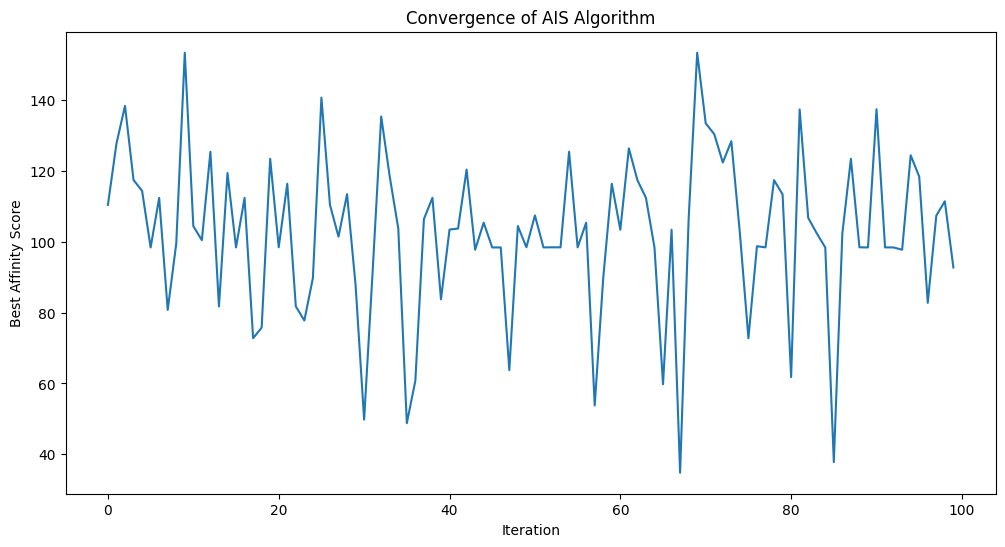

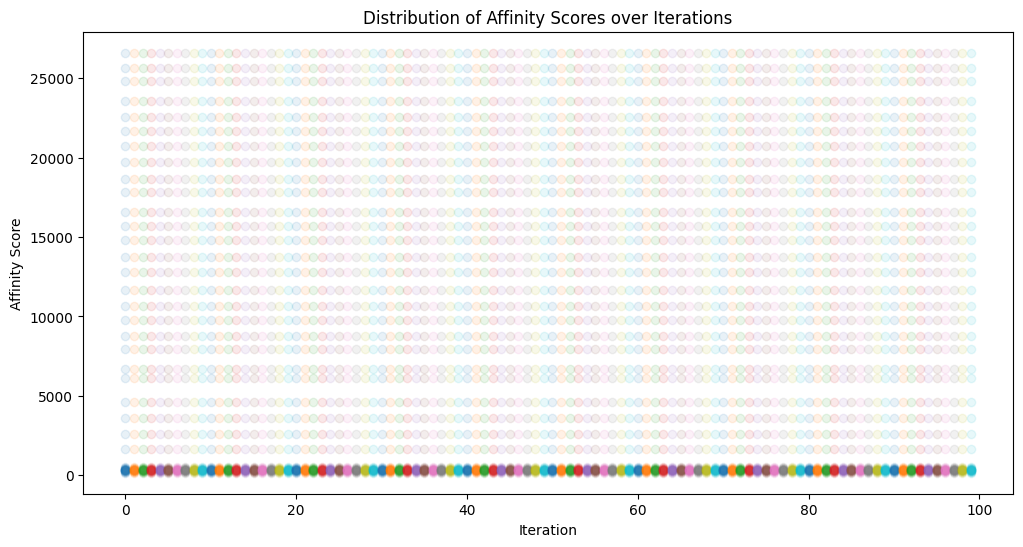

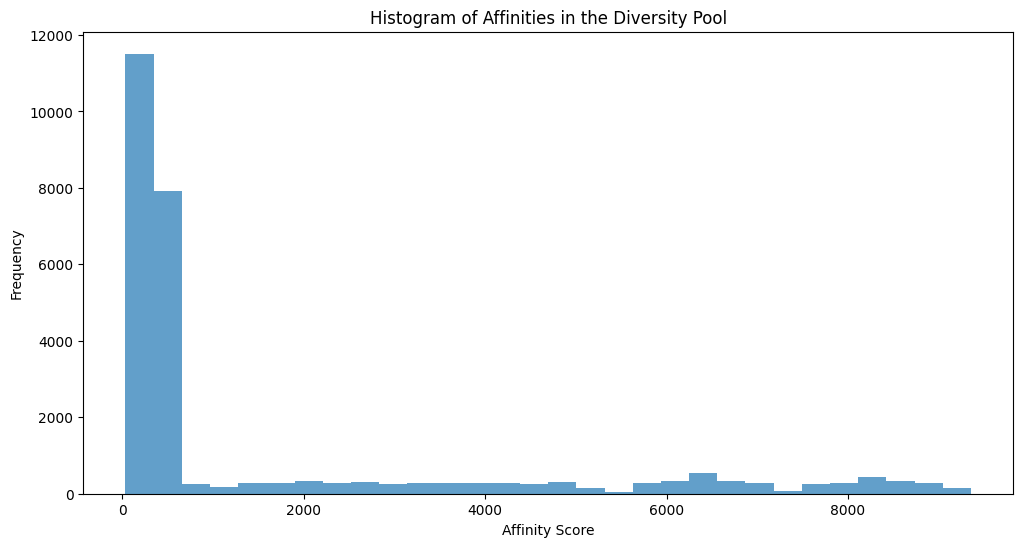

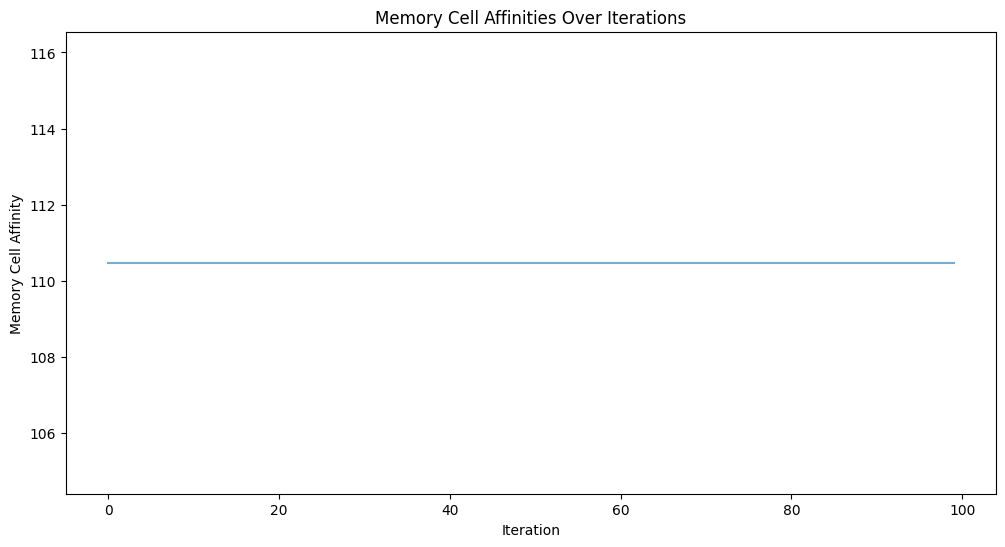


Computation Time: 0.87 seconds

Number of Unique Solutions in Diversity Pool: 27055


In [297]:
import numpy as np
import random
import time
from statistics import mean, stdev
import matplotlib.pyplot as plt

destination_pool = [
    ("Makarska", 40, 800, 3, 80, "Letovanje"),
    ("Sarajevo", 100, 1500, 2, 120, "Zimovanje"),
    ("Sveti Stefan", 15, 300, 6, 40, "Letovanje"),
    ("Miami", 60, 2000, 4, 150, "Letovanje"),
    ("Bangkok", 90, 2500, 3, 100, "Letovanje"),
    ("Sydney", 75, 3500, 2, 130, "Letovanje"),
    ("Los Angeles", 60, 4000, 5, 200, "Letovanje"),
    ("Dubai", 70, 5000, 4, 180, "Letovanje"),
    ("Tokyo", 33.33, 6000, 3, 100, "Letovanje"),
    ("Reykjavik", 110, 7000, 2, 150, "Zimovanje"),
    ("Amsterdam", 110, 8000, 1, 80, "Letovanje"),
    ("Cape Town", 76.67, 9000, 3, 140, "Letovanje"),
    ("Rio de Janeiro", 95, 10000, 2, 120, "Letovanje"),
    ("New York City", 42.5, 11000, 4, 160, "Letovanje"),
    ("Santorini", 66.67, 12000, 3, 140, "Letovanje"),
    ("Mauritius", 125, 13000, 2, 180, "Letovanje"),
    ("Maldives", 30, 14000, 5, 100, "Letovanje"),
    ("Bora Bora", 67.5, 15000, 4, 200, "Letovanje"),
    ("Barcelona", 60, 16000, 3, 120, "Letovanje"),
    ("Lisbon", 70, 17000, 2, 90, "Letovanje"),
    ("Prague", 160, 18000, 1, 100, "Letovanje"),
    ("Berlin", 40, 19000, 3, 80, "Zimovanje"),
    ("Paris", 45, 20000, 2, 90, "Letovanje"),
    ("Rome", 25, 21000, 4, 60, "Letovanje"),
    ("London", 43.33, 22000, 3, 80, "Letovanje"),
    ("Istanbul", 55, 23000, 2, 70, "Letovanje"),
    ("Singapore", 250, 24000, 1, 150, "Letovanje"),
    ("Seoul", 60, 25000, 3, 120, "Letovanje"),
    ("Honolulu", 150, 26000, 2, 200, "Letovanje"),
    ("Shanghai", 70, 27000, 4, 140, "Letovanje"),
    ("Moscow", 73.33, 28000, 3, 150, "Letovanje"),
    ("Buenos Aires", 42.5, 29000, 2, 110, "Letovanje"),
    ("Cancun", 26, 30000, 5, 130, "Letovanje"),
    ("Marrakech", 75, 31000, 4, 180, "Letovanje"),
    ("Kyoto", 76.67, 32000, 3, 150, "Letovanje"),
    ("Cairo", 105, 33000, 2, 120, "Letovanje"),
    ("Havana", 80, 34000, 1, 80, "Letovanje"),
    ("Vienna", 23.33, 35000, 3, 70, "Letovanje"),
    ("Vancouver", 150, 36000, 2, 200, "Zimovanje"),
    ("Toronto", 70, 37000, 4, 180, "Zimovanje"),
    ("Budapest", 43.33, 38000, 3, 160, "Letovanje"),
    ("Edinburgh", 70, 39000, 2, 140, "Letovanje"),
    ("Auckland", 24, 40000, 5, 120, "Letovanje"),
    ("Bariloche", 50, 41000, 4, 100, "Zimovanje"),
    ("Cusco", 60, 42000, 3, 80, "Zimovanje"),
    ("Prague", 160, 43000, 2, 70, "Letovanje"),
    ("Krakow", 60, 44000, 1, 60, "Letovanje"),
    ("Bruges", 50, 45000, 3, 50, "Letovanje")
]

def generate_random_user_preferences():
    total_budget = random.randint(500, 10000)
    number_of_travelers = random.randint(1, 5)
    preferred_distance = random.randint(0, 50000)
    preferred_type = random.choice(["Letovanje", "Zimovanje"])
    preferred_accommodation_price = random.randint(20, 200)
    preferred_transportation_price = random.randint(20, 300)
    return total_budget, number_of_travelers, preferred_distance, preferred_type, preferred_accommodation_price, preferred_transportation_price

random_preferences = generate_random_user_preferences()

# Define hyperparameters
accommodation_prices = [dest[1] for dest in destination_pool]
distances = [dest[2] for dest in destination_pool]
max_passengers = [dest[3] for dest in destination_pool]
transportation_prices = [dest[4] for dest in destination_pool]

stats = {
    'accommodation_price': {'mean': mean(accommodation_prices), 'stdev': stdev(accommodation_prices)},
    'distance': {'mean': mean(distances), 'stdev': stdev(distances)},
    'max_passengers': {'mean': mean(max_passengers), 'stdev': stdev(max_passengers)},
    'transportation_price': {'mean': mean(transportation_prices), 'stdev': stdev(transportation_prices)},
}

def calculate_affinity(destination, user_preferences, stats):
    destination_name, accommodation_price, distance, max_passengers, transportation_price, destination_type = destination
    total_budget, number_of_travelers, preferred_distance, preferred_type, preferred_accommodation_price, preferred_transportation_price = user_preferences

    accommodation_price_normalized = (accommodation_price - stats['accommodation_price']['mean']) / stats['accommodation_price']['stdev']
    distance_normalized = (distance - stats['distance']['mean']) / stats['distance']['stdev']
    max_passengers_normalized = (max_passengers - stats['max_passengers']['mean']) / stats['max_passengers']['stdev']
    transportation_price_normalized = (transportation_price - stats['transportation_price']['mean']) / stats['transportation_price']['stdev']

    penalty = 0

    if destination_type != preferred_type:
        penalty += 100

    if distance > preferred_distance:
        penalty += distance - preferred_distance

    total_cost = (accommodation_price * number_of_travelers) + (transportation_price * number_of_travelers)

    if total_cost > total_budget:
        penalty += total_cost - total_budget

    if accommodation_price > preferred_accommodation_price:
        penalty += accommodation_price - preferred_accommodation_price

    if transportation_price > preferred_transportation_price:
        penalty += transportation_price - preferred_transportation_price

    affinity = distance_normalized + total_cost + penalty
    return affinity

def generate_clones(selected_destinations, num_clones):
    clones = []
    for destination in selected_destinations:
        clones.extend([destination] * num_clones)
    return clones

def apply_mutation(clones, mutation_rate):
    mutated_clones = []
    for clone in clones:
        if np.random.rand() < mutation_rate:
            mutated_clone = list(clone)
            # Mutate distance
            mutated_clone[2] = max(0, mutated_clone[2] + np.random.randint(-500, 500))
            # Mutate accommodation price
            mutated_clone[1] = max(0, mutated_clone[1] + np.random.randint(-50, 50))
            # Mutate transportation price
            mutated_clone[4] = max(0, mutated_clone[4] + np.random.randint(-50, 50))
            mutated_clones.append(tuple(mutated_clone))
        else:
            mutated_clones.append(clone)
    return mutated_clones

def recommend_travel_destination(user_preferences, destination_pool, num_clones, num_iterations, mutation_rate, stats):
    memory_cells = []
    diversity_pool = []
    best_affinity_scores = []
    all_affinity_scores = []
    memory_cell_affinities = []

    start_time = time.time()

    for iteration in range(num_iterations):
        affinities = [calculate_affinity(destination, user_preferences, stats) for destination in destination_pool]
        all_affinity_scores.append(affinities)

        selected_indices = np.argsort(affinities)[:num_clones]
        selected_destinations = [destination_pool[i] for i in selected_indices]

        clones = generate_clones(selected_destinations, num_clones)
        mutated_clones = apply_mutation(clones, mutation_rate)
        clone_affinities = [calculate_affinity(clone, user_preferences, stats) for clone in mutated_clones]

        best_clone_index = np.argmin(clone_affinities)
        best_clone = mutated_clones[best_clone_index]

        memory_cells.append(best_clone)
        diversity_pool.extend(mutated_clones)

        # Preserve diversity by keeping unique clones
        diversity_pool = list(set(diversity_pool))

        # Track the best affinity score
        best_affinity_scores.append(min(clone_affinities))

        # Track memory cell affinities
        memory_cell_affinities.append([calculate_affinity(cell, user_preferences, stats) for cell in memory_cells])

    end_time = time.time()

    memory_affinities = [calculate_affinity(cell, user_preferences, stats) for cell in memory_cells]
    best_memory_index = np.argmin(memory_affinities)
    best_memory_cell = memory_cells[best_memory_index]

    computation_time = end_time - start_time

    return best_memory_cell, memory_cells, diversity_pool, best_affinity_scores, all_affinity_scores, memory_cell_affinities, computation_time

num_clones = 30
num_iterations = 100
mutation_rate = 0.3

recommended_destination, memory_cells, diversity_pool, best_affinity_scores, all_affinity_scores, memory_cell_affinities, computation_time = recommend_travel_destination(random_preferences, destination_pool, num_clones, num_iterations, mutation_rate, stats)

# Presenting the results

# 1. Recommended Destination
print(f"Preporučena destinacija: {recommended_destination}")

# 2. Memory Cells
print("\nMemory Cells:")
for cell in memory_cells:
    print(cell)

# 3. Diversity Pool (Sample of 10)
print("\nDiversity Pool (Sample of 10):")
for destination in diversity_pool[:10]:
    print(destination)

# 4. Convergence Plot
plt.figure(figsize=(12, 6))
plt.plot(range(num_iterations), best_affinity_scores)
plt.xlabel('Iteration')
plt.ylabel('Best Affinity Score')
plt.title('Convergence of AIS Algorithm')
plt.show()

# 5. Affinity Scores Distribution Plot
plt.figure(figsize=(12, 6))
for i in range(num_iterations):
    plt.scatter([i] * len(all_affinity_scores[i]), all_affinity_scores[i], alpha=0.1)
plt.xlabel('Iteration')
plt.ylabel('Affinity Score')
plt.title('Distribution of Affinity Scores over Iterations')
plt.show()

# 6. Histogram of Diversity Pool
diversity_pool_affinities = [calculate_affinity(destination, random_preferences, stats) for destination in diversity_pool]
plt.figure(figsize=(12, 6))
plt.hist(diversity_pool_affinities, bins=30, alpha=0.7)
plt.xlabel('Affinity Score')
plt.ylabel('Frequency')
plt.title('Histogram of Affinities in the Diversity Pool')
plt.show()

# 7. Memory Cell Affinities Over Iterations
plt.figure(figsize=(12, 6))
for i in range(len(memory_cell_affinities[0])):
    plt.plot(range(num_iterations), [affinities[i] for affinities in memory_cell_affinities], alpha=0.6)
plt.xlabel('Iteration')
plt.ylabel('Memory Cell Affinity')
plt.title('Memory Cell Affinities Over Iterations')
plt.show()

# 8. Computation Time
print(f"\nComputation Time: {computation_time:.2f} seconds")

# 9. Diversity (Number of Unique Solutions)
print(f"\nNumber of Unique Solutions in Diversity Pool: {len(set(diversity_pool))}")


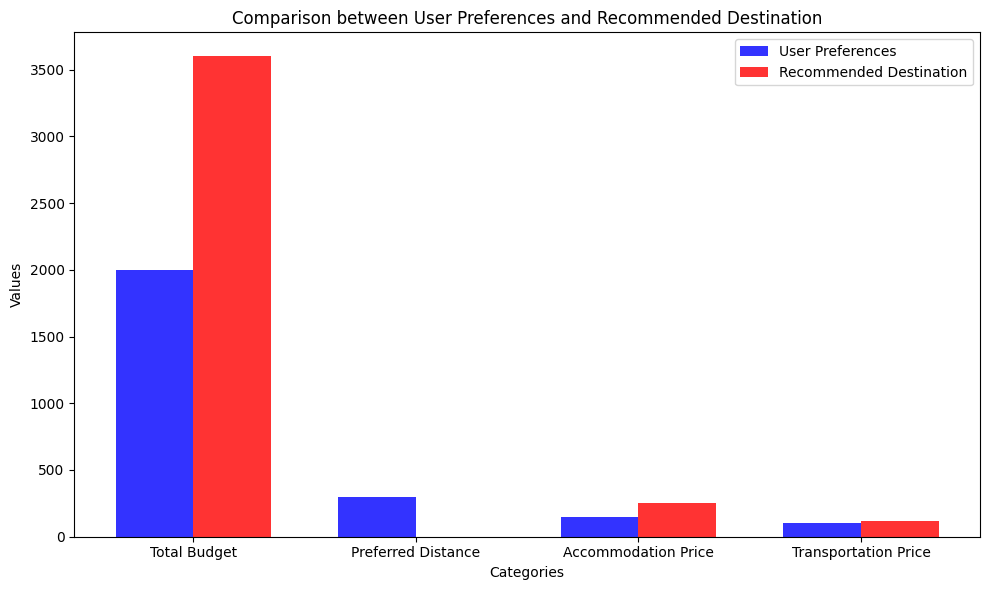

In [298]:
import matplotlib.pyplot as plt

# Example data (you should replace these with your actual data)
random_preferences = [2000, 1.5, 300, 2.0, 150, 100]
recommended_destination = [0, 1.2, 250, 0, 120, 90]

# User preferences
user_preferences_labels = ['Total Budget', 'Preferred Distance', 'Accommodation Price', 'Transportation Price']
user_preferences_values = [random_preferences[0], random_preferences[2], random_preferences[4], random_preferences[5]]

# Recommended destination
recommended_destination_labels = ['Total Budget', 'Distance', 'Accommodation Price', 'Transportation Price']
# Adjust the values to be numeric
total_budget = int(recommended_destination[1] * random_preferences[1] * random_preferences[0])
recommended_destination_values = [total_budget, recommended_destination[1], recommended_destination[2], recommended_destination[4], recommended_destination[5]]

# Ensure the lengths match
recommended_destination_values = [total_budget, recommended_destination[1], recommended_destination[2], recommended_destination[4]]

# Plotting
x = range(len(user_preferences_labels))

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
opacity = 0.8

rects1 = ax.bar(x, user_preferences_values, bar_width, alpha=opacity, color='b', label='User Preferences')
rects2 = ax.bar([p + bar_width for p in x], recommended_destination_values, bar_width, alpha=opacity, color='r', label='Recommended Destination')

ax.set_xlabel('Categories')
ax.set_ylabel('Values')
ax.set_title('Comparison between User Preferences and Recommended Destination')
ax.set_xticks([p + 0.5 * bar_width for p in x])
ax.set_xticklabels(user_preferences_labels)
ax.legend()

plt.tight_layout()
plt.show()
